In [1]:
import pandas as pd
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
font = {'size': 16}
matplotlib.rc('font', **font)

In [2]:
basedir = './국토교통부_실거래가_공개시스템/땅값분석/'
yunrip_df = pd.read_csv(basedir + 'yunrip_30.csv')
commerce_df = pd.read_csv(basedir + 'commerce_30.csv')
land_df = pd.read_csv(basedir + 'land.csv')

In [3]:
common_cols = ['시군구', '번지', '용도지역', '도로조건', '계약날짜', '대지면적(㎡)', '거래금액(만원)', '단가(㎡)', '단가(평)', '거래유형', '건물연식']
common_df = pd.concat([yunrip_df[common_cols], commerce_df[common_cols], land_df[[col for col in land_df.columns if col not in ['지목', '지분구분', '해제사유발생일']]]])
print(common_df.shape)
common_df.head()

(87439, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2019-03-18,21.53,38000.0,1764.979099,5834.641431,연립/다세대,31.0
1,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-10-16,44.19,65000.0,1470.921023,4862.548654,연립/다세대,32.0
2,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-12-23,21.53,31000.0,1439.851370,4759.839062,연립/다세대,32.0
3,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2018-06-14,45.00,52000.0,1155.555556,3820.018222,연립/다세대,30.0
4,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2019-03-05,45.00,50000.0,1111.111111,3673.094444,연립/다세대,31.0


In [4]:
common_df['계약날짜'] = pd.to_datetime(common_df['계약날짜'], format='%Y-%m-%d')
common_df.head()

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2019-03-18,21.53,38000.0,1764.979099,5834.641431,연립/다세대,31.0
1,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-10-16,44.19,65000.0,1470.921023,4862.548654,연립/다세대,32.0
2,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-12-23,21.53,31000.0,1439.851370,4759.839062,연립/다세대,32.0
3,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2018-06-14,45.00,52000.0,1155.555556,3820.018222,연립/다세대,30.0
4,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2019-03-05,45.00,50000.0,1111.111111,3673.094444,연립/다세대,31.0


In [5]:
target = '신림동'
target_purpose = '3종일반'
계약일자시점 = 2018

In [6]:
target_df = common_df[(common_df['시군구'].str.contains(target))&(common_df['용도지역'].str.contains(target_purpose))&(common_df['계약날짜'].dt.year >= 계약일자시점)].sort_values(['단가(평)'], ascending=False)
print(target_df.shape)
target_df.head()

(54, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
37959,서울특별시 관악구 신림동,1***,제3종일반주거지역,-,2020-10-28,4.36,9103.0,2087.844037,6901.963499,토지,NaN
6404,서울특별시 관악구 신림동,1***,제3종일반주거,25m미만,2019-09-25,151.80,270000.0,1778.656126,5879.854743,상업/업무,31.0
8040,서울특별시 관악구 신림동,5**,제3종일반주거,25m이상,2020-07-24,1020.10,1470000.0,1441.035193,4763.752524,상업/업무,44.0
8039,서울특별시 관악구 신림동,1***,제3종일반주거,25m미만,2020-07-22,333.20,480000.0,1440.576230,4762.235294,상업/업무,36.0
30851,서울특별시 관악구 신림동,1*,제3종일반주거지역,25m이상,2019-10-21,347.00,443520.0,1278.155620,4225.307675,토지,NaN


In [7]:
#target_df = target_df[target_df['단가(평)'] <= 5000]

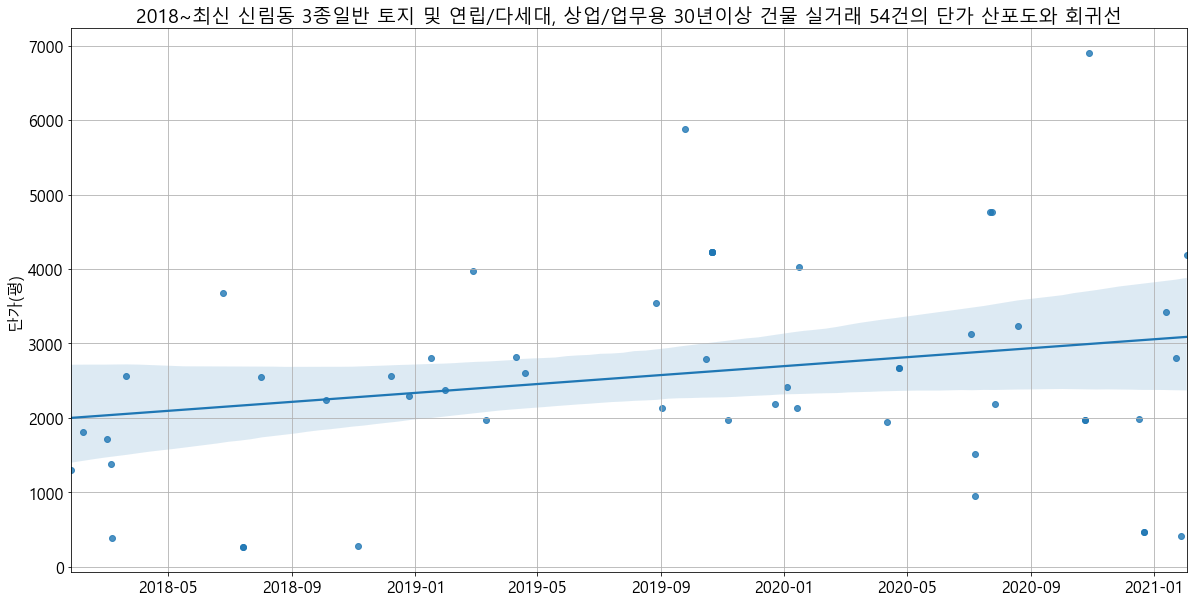

In [9]:
f, ax = plt.subplots(figsize=(20,10))
plt.title('{}~최신 {} {} 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 산포도와 회귀선'.format(계약일자시점, target, target_purpose, target_df.shape[0]))
plt.grid(True)
ax.xaxis.update_units(target_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(target_df['계약날짜']), y=target_df['단가(평)'])
plt.savefig(basedir + '{}{}/산포도.png'.format(target, target_purpose))

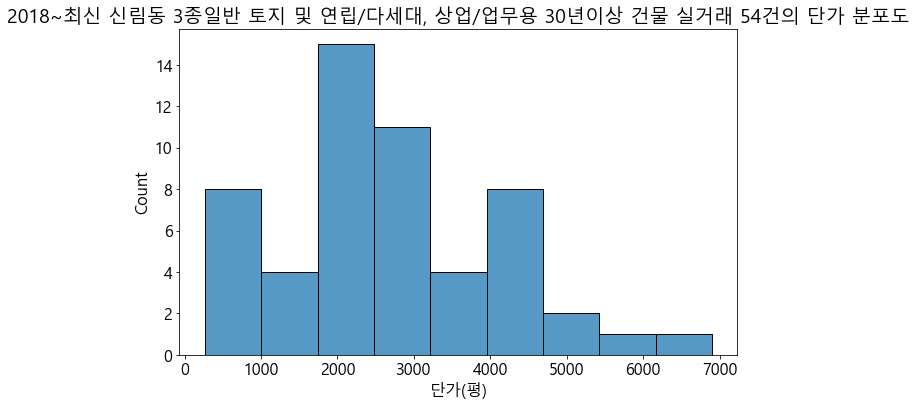

거래량: 54.0
평균: 2600.349327999459
표준편차: 1433.851832318408
최소: 264.4628
25분위: 1948.7070393702654
중간값: 2479.1465668794344
75분위: 3514.9490812150502
최대: 6901.963498853212


<Figure size 432x288 with 0 Axes>

In [10]:
font = {'size': 16}
matplotlib.rc('font', **font)
f, ax = plt.subplots(figsize=(10,6))
plt.title('{}~최신 {} {} 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(계약일자시점, target, target_purpose, target_df.shape[0]))
sns.histplot(target_df['단가(평)'])
plt.savefig(basedir + '{}{}/분포도.png'.format(target, target_purpose))
plt.show()
plt.clf()

description = target_df['단가(평)'].describe()
print('거래량:', description['count'])
print('평균:', description['mean'])
print('표준편차:', description['std'])
print('최소:', description['min'])
print('25분위:', description['25%'])
print('중간값:', description['50%'])
print('75분위:', description['75%'])
print('최대:', description['max'])


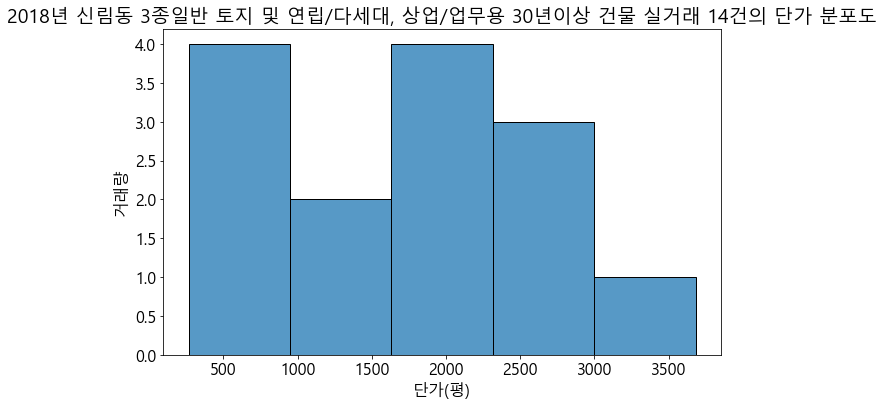

거래량: 14.0
평균: 1662.6331817123075
표준편차: 1070.4562749704673
최소: 264.4628
25분위: 611.2048752858232
중간값: 1761.7106385228913
75분위: 2484.0574825157487
최대: 3683.5442152678993


<Figure size 432x288 with 0 Axes>

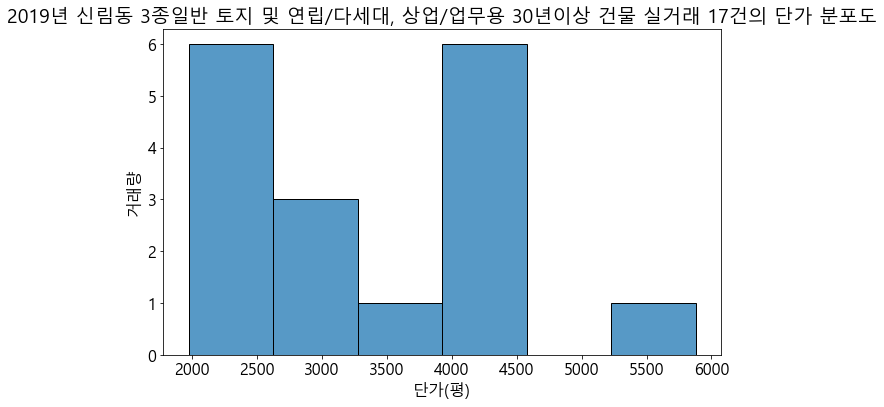

거래량: 17.0
평균: 3304.0063226989955
표준편차: 1107.9818490713367
최소: 1972.294663573086
25분위: 2370.1854716981134
중간값: 2814.8658333747085
75분위: 4221.487445000001
최대: 5879.854743083004


<Figure size 432x288 with 0 Axes>

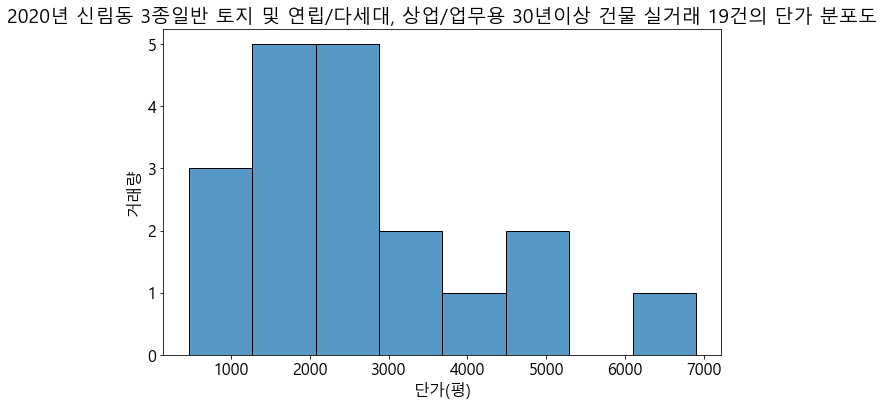

거래량: 19.0
평균: 2639.467831001077
표준편차: 1592.5317316083442
최소: 461.1289923728813
25분위: 1956.517582528409
중간값: 2185.241645244216
75분위: 3177.368002624927
최대: 6901.963498853212


<Figure size 432x288 with 0 Axes>

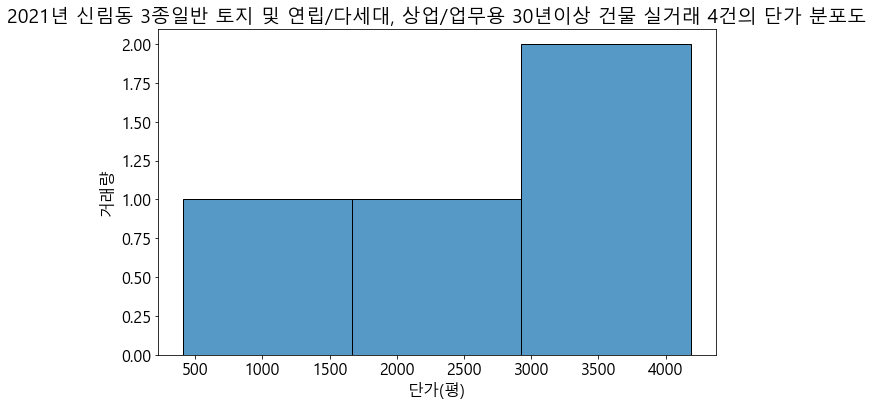

거래량: 4.0
평균: 2706.0007232737757
표준편차: 1630.3158275930077
최소: 410.9401243093923
25분위: 2210.172968577348
중간값: 3113.67368883855
75분위: 3609.5014435349776
최대: 4185.715391108611


<Figure size 432x288 with 0 Axes>

In [11]:
for year in sorted(target_df['계약날짜'].dt.year.unique()):
    year_df = target_df[target_df['계약날짜'].dt.year == year]
    
    f, ax = plt.subplots(figsize=(10,6))
    plt.title('{}년 {} {} 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(year, target, target_purpose, year_df.shape[0]))
    plt.ylabel('거래량')
    sns.histplot(year_df['단가(평)'])
    plt.savefig(basedir + '{}{}/{}분포도.png'.format(target, target_purpose, year))
    plt.show()
    plt.clf()
    
    description = year_df['단가(평)'].describe()
    print('거래량:', description['count'])
    print('평균:', description['mean'])
    print('표준편차:', description['std'])
    print('최소:', description['min'])
    print('25분위:', description['25%'])
    print('중간값:', description['50%'])
    print('75분위:', description['75%'])
    print('최대:', description['max'])

In [12]:
target_df = target_df.sort_values(['단가(평)'], ascending=False).reset_index(drop=True)

In [13]:
target_df.head(20)

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 관악구 신림동,1***,제3종일반주거지역,-,2020-10-28,4.36,9103.0,2087.844037,6901.963499,토지,NaN
1,서울특별시 관악구 신림동,1***,제3종일반주거,25m미만,2019-09-25,151.80,270000.0,1778.656126,5879.854743,상업/업무,31.0
2,서울특별시 관악구 신림동,5**,제3종일반주거,25m이상,2020-07-24,1020.10,1470000.0,1441.035193,4763.752524,상업/업무,44.0
3,서울특별시 관악구 신림동,1***,제3종일반주거,25m미만,2020-07-22,333.20,480000.0,1440.576230,4762.235294,상업/업무,36.0
4,서울특별시 관악구 신림동,1*,제3종일반주거지역,25m이상,2019-10-21,347.00,443520.0,1278.155620,4225.307675,토지,NaN
5,서울특별시 관악구 신림동,8**,제3종일반주거지역,25m이상,2019-10-21,49.00,62573.0,1277.000000,4221.487445,토지,NaN
6,서울특별시 관악구 신림동,*,제3종일반주거지역,25m이상,2019-10-21,21.00,26817.0,1277.000000,4221.487445,토지,NaN
7,서울특별시 관악구 신림동,*,제3종일반주거지역,25m이상,2019-10-21,107.00,136639.0,1277.000000,4221.487445,토지,NaN
8,서울특별시 관악구 신림동,8**,제3종일반주거지역,25m이상,2019-10-21,63.00,80451.0,1277.000000,4221.487445,토지,NaN
9,서울특별시 관악구 신림동,5**,제3종일반주거,25m이상,2021-02-02,355.40,450000.0,1266.178953,4185.715391,상업/업무,41.0


In [14]:
target_df.tail(20)

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
34,서울특별시 관악구 신림동,408-163,제3종일반주거지역,8m미만,2019-09-02,29.46,19000.0,644.942295,2132.040563,연립/다세대,33.0
35,서울특별시 관악구 신림동,92-279,제3종일반주거지역,8m미만,2020-12-17,27.48,16500.0,600.436681,1984.914574,연립/다세대,33.0
36,서울특별시 관악구 신림동,5**,제3종일반주거,12m미만,2019-03-12,207.60,124000.0,597.302505,1974.553661,상업/업무,43.0
37,서울특별시 관악구 신림동,408-163,제3종일반주거지역,8m미만,2019-11-06,30.17,18000.0,596.619158,1972.294664,연립/다세대,33.0
38,서울특별시 관악구 신림동,566-6,제3종일반주거지역,12m미만,2020-10-24,52.80,31500.0,596.590909,1972.201278,연립/다세대,40.0
39,서울특별시 관악구 신림동,566-6,제3종일반주거지역,12m미만,2020-10-24,52.80,31499.0,596.571970,1972.138669,연립/다세대,40.0
40,서울특별시 관악구 신림동,566-6,제3종일반주거지역,12m미만,2020-04-12,52.80,31000.0,587.121212,1940.896496,연립/다세대,40.0
41,서울특별시 관악구 신림동,408-163,제3종일반주거지역,8m미만,2018-02-06,30.17,16500.0,546.900895,1807.936775,연립/다세대,32.0
42,서울특별시 관악구 신림동,107-101,제3종일반주거지역,25m미만,2018-03-02,71.30,37000.0,518.934081,1715.484502,연립/다세대,37.0
43,서울특별시 관악구 신림동,3**,제3종일반주거지역,-,2020-07-08,96.00,44000.0,458.333333,1515.151458,토지,NaN


In [15]:
target_df.to_excel('./국토교통부_실거래가_공개시스템/땅값분석/{}{}/{}_{}_땅값분석.xlsx'.format(target, target_purpose, target, target_purpose), index=False)